# Tarea Estabilidad

In [1]:
import numpy as np
from math import pi 
import scipy as sp
import matplotlib.pyplot as plt

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Pm = 0.75
Xd = 0.22
Xt = 0.16
XL1 = 0.34
XL2 = 0.34
XL = XL1*XL2/(XL1+XL2)
V = 0.98 # Tensión barra infinita
absV = np.abs(V)
absVg = 1.05 # Tensión bornes generador
H = 4.2

## Punto 1

In [3]:
angVg = np.arcsin(Pm*(XL+Xt)/(absV*absVg))
Vg = absVg*np.exp(1j*angVg)
I = (Vg-V)/((XL+Xt)*1j)
E = I*1j*Xd+Vg

print(np.abs(E))
print(np.angle(E)*180/pi)

1.1268573359973566
21.933670406157795


## Punto 2

In [4]:
t = 210*10**(-3)

#### a)

In [5]:
delta0 = np.angle(E)-np.angle(V)
ws = 2*pi*60
delta1 = ws*Pm/(4*H)*t**2 + delta0
print(delta1*180/pi)

64.45867040615778


#### b)

In [6]:
def P1(delta):
    return P1max*np.sin(delta) # Antes de falla
def P2(delta):
    return P2max*np.sin(delta) # Durante la falla
def P3(delta):
    return P3max*np.sin(delta) # Después de la falla

X = Xd+Xt+XL
absE = np.abs(E)
P1max = absE*absV/X
P2max = 0
P3max = absE*absV/(Xd+Xt+XL1)
delta2 = 1.8727
A_ac = sp.integrate.quad(lambda x:Pm-P2(x),delta0, delta1)[0]
print(A_ac)

deltamax = pi-np.arcsin(Pm/P3max)

A_des = sp.integrate.quad(lambda x: P3(x)-Pm, delta1, deltamax)[0]
print(A_des)

delta2 = 1.8727 # Resolviendo numericamente

0.5566509483079414
0.8699713612489074


In [7]:
P3max

1.5337780406630688

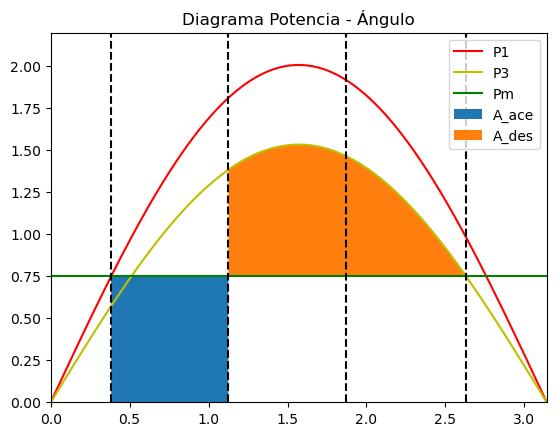

In [7]:
# Diagrama
vector_delta = np.linspace(0, pi, 1000)
vector_P1 = P1(vector_delta)
vector_P3 = P3(vector_delta)
vector_Pm = [Pm for i in vector_delta]

plt.plot(vector_delta,vector_P1, color="r", label="P1")
plt.plot(vector_delta,vector_P3, color="y", label="P3")
plt.plot(vector_delta,vector_Pm, color="g", label="Pm")
plt.xlim([0, pi])
plt.ylim([0, 2.2])

vector_A1 = np.linspace(delta0, delta1, 1000)
vector_A2 = np.linspace(delta1, deltamax, 1000)

plt.fill_between(vector_A1, 0, vector_Pm, label="A_ace")
plt.fill_between(vector_A2, P3(vector_A2), vector_Pm, label="A_des")

plt.vlines([delta0,delta1,delta2,deltamax],ymin=0,ymax=2.2,color="k",linestyle="dashed")


plt.legend(loc = "upper right")
plt.title("Diagrama Potencia - Ángulo")
plt.show()

#### c) 

A_ace < A_des

El sistema es transitoriamente estable

#### d)

In [8]:
deltac = np.arccos((Pm/P3max)*(deltamax-delta0)+np.cos(deltamax))
print(deltac*180/pi)

tc = np.sqrt((4*H*(deltac-delta0)/(ws*Pm)))
print(tc)

76.88643461368912
0.23872170360227668


## Punto 3

In [9]:
f = 1/3
delta1 = 108*pi/180

#### a)

In [10]:
Xa = Xd+Xt+XL
Xb = Xd+Xt+XL1+(Xd+Xt)*XL1/(f*XL2)
Xc = Xd+Xt+XL1

P1max = absE*absV/Xa
P2max = absE*absV/Xb
P3max = absE*absV/Xc

A_ac = sp.integrate.quad(lambda x: Pm-P2(x), delta0, delta1)[0]
print(A_ac)

deltamax = pi-np.arcsin(Pm/P3max)

A_des = sp.integrate.quad(lambda x: P3(x)-Pm, delta1, deltamax)[0]
print(A_des)

0.3923906840740894
0.30465566326651267


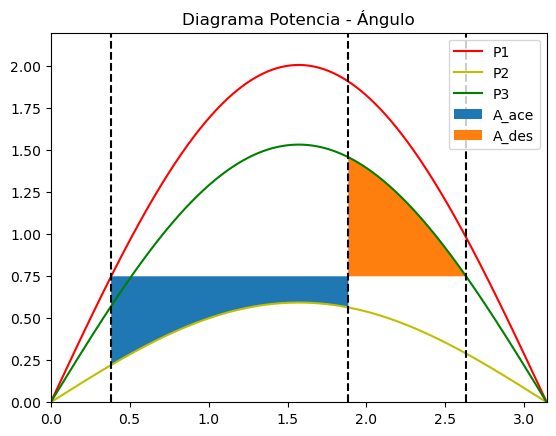

In [11]:
# Diagrama
vector_delta = np.linspace(0, pi, 1000)
vector_P1 = P1(vector_delta)
vector_P2 = P2(vector_delta)
vector_P3 = P3(vector_delta)

plt.plot(vector_delta,vector_P1, color="r", label="P1")
plt.plot(vector_delta,vector_P2, color="y", label="P2")
plt.plot(vector_delta,vector_P3, color="g", label="P3")
plt.xlim([0, pi])
plt.ylim([0, 2.2])

vector_A1 = np.linspace(delta0, delta1, 1000)
vector_A2 = np.linspace(delta1, deltamax, 1000)

plt.fill_between(vector_A1, P2(vector_A1), Pm, label="A_ace")
plt.fill_between(vector_A2, Pm, P3(vector_A2), label="A_des")

plt.vlines([delta0,delta1,deltamax],ymin=0,ymax=2.2,color="k",linestyle="dashed")

plt.legend(loc = "upper right")
plt.title("Diagrama Potencia - Ángulo")
plt.show()

#### b)

A_ac > A_des

El sistema es transitoriamente inestable

#### c)

In [12]:
deltac = np.arccos((Pm*(deltamax-delta0)+P3max*np.cos(deltamax)-P2max*np.cos(delta0))/(P3max-P2max))
print(deltac*180/pi)

102.45586897626009
